<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


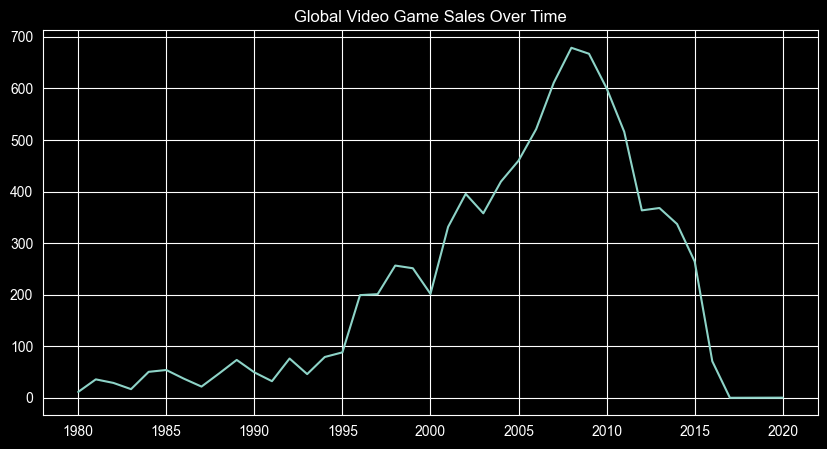

In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/vgsales.csv")
df.head()
df.info()

df.isnull().sum()

df = df.dropna(subset=["Year"])
df["Year"] = df["Year"].astype(int)

sales_by_year = (
    df.groupby("Year")["Global_Sales"]
    .sum()
    .reset_index()
    .sort_values("Year")
)

sales_by_platform = (
    df.groupby("Platform")["Global_Sales"]
    .sum()
    .reset_index()
    .sort_values("Global_Sales", ascending=False)
)

sales_by_genre = (
    df.groupby("Genre")["Global_Sales"]
    .sum()
    .reset_index()
    .sort_values("Global_Sales", ascending=False)
)

sales_by_publisher = (
    df.groupby("Publisher")["Global_Sales"]
    .sum()
    .reset_index()
    .sort_values("Global_Sales", ascending=False)
)

regional_sales = df[
    ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]
].sum().reset_index()

regional_sales.columns = ["Region", "Sales"]

plt.figure(figsize=(10,5))
plt.plot(sales_by_year["Year"], sales_by_year["Global_Sales"])
plt.title("Global Video Game Sales Over Time")
plt.show()

ai_summary = {
    "total_global_sales": df["Global_Sales"].sum(),
    "top_platforms": sales_by_platform.head(5).to_dict("records"),
    "top_genres": sales_by_genre.head(5).to_dict("records"),
    "top_publishers": sales_by_publisher.head(5).to_dict("records"),
    "regional_sales": regional_sales.to_dict("records"),
    "recent_trend": sales_by_year.tail(10).to_dict("records")
}

import json

with open("../output/ai_input_summary.json", "w") as f:
    json.dump(ai_summary, f, indent=4)